### PeerReviewProject_DeepLearning

#### Author: Yan Li
#### Date: 2/11/2022

##### Description:

    This project includes three parts:
        Image recognition by CNN;
        Text recognition by RNN/LSTM
        Reinforcement Learning

##### Load modules

In [1]:
import numpy as np, pandas as pd
import matplotlib as plt
import seaborn as sns
import os


#### Image Recognition by CNN

    I'll use the MNIST digit data. First do a small CNN with single convolutional layers and check the execution time and accuracy; then do multiple layers CNN and check the execution time and accuracy. Last, add learning transfer and check the execution time and accuracy.

In [2]:
import datetime
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

In [3]:
### load the data
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [4]:
print('training data size x', x_train.shape)
print('training data size y', y_train.shape)
print('testing data size x', x_test.shape)
print('testing data size y', y_test.shape)

training data size x (60000, 28, 28)
training data size y (60000,)
testing data size x (10000, 28, 28)
testing data size y (10000,)


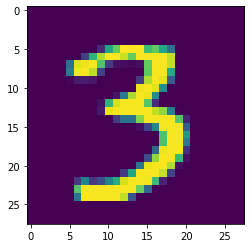

In [5]:
### vary index from 0 to 59999 to view the image (number digit image)
plt.imshow(x_train[10000,:,:])

We can see more of the data by plotting a 30x30 2D manifold of digits

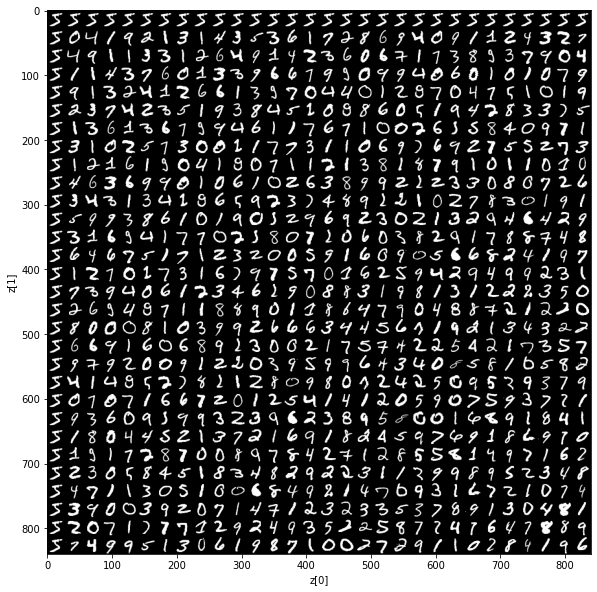

In [18]:
# display a 30x30 2D manifold of digits
lim=4
n = 30
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates corresponding to the 2D plot
# of digit classes in the latent space
grid_x = np.linspace(-1.0 * lim, lim, n)
grid_y = np.linspace(-1.0 * lim, lim, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        #x_decoded = z_sample
        digit = x_train[int(i*j)].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
start_range = digit_size // 2
end_range = n * digit_size + start_range + 1
pixel_range = np.arange(start_range, end_range, digit_size)
sample_range_x = np.round(grid_x, 1)
sample_range_y = np.round(grid_y, 1)
#plt.xticks(pixel_range, sample_range_x)
#plt.yticks(pixel_range, sample_range_y)
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.imshow(figure, cmap='Greys_r')
plt.show()

In [6]:
###check the levels of y_train and test
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
### transform y to dummy variables
num_classes = 10 ##based on the above observations/results
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [9]:
###check the y_train
y_train[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
### transform x to float and scale by the largest number
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [11]:
# set some more parameters
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3

In [12]:
## This just handles some variability in how the input data is loaded

if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

In [13]:
input_shape

(28, 28, 1)

In [14]:
### build a CNN

model_1 = Sequential()

model_1.add(Conv2D(filters=32, 
                   kernel_size=(3,3),
                   strides = (2,2),
                   padding='valid', 
                   input_shape= input_shape ))

model_1.add(Activation('relu'))

model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 activation (Activation)     (None, 13, 13, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 6, 6, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 512)               590336    
                                                        

In [15]:
#used to help some of the timing functions
now = datetime.datetime.now

In [16]:
batch_size = 32

### initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate = 0.0005, decay = 1e-06)

### train the data
model_1.compile(loss = 'categorical_crossentropy',
               optimizer = opt,
               metrics = ['accuracy'])
start = now()
model_1.fit(x_train,y_train,
           batch_size = batch_size,
           epochs = 5,
           validation_data = (x_test,y_test),
           shuffle = True)
print('Training time: %s' % (now()-start))

Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3390 - accuracy: 0.8979 - val_loss: 0.1199 - val_accuracy: 0.9632
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1467 - accuracy: 0.9554 - val_loss: 0.0847 - val_accuracy: 0.9741
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1134 - accuracy: 0.9662 - val_loss: 0.0665 - val_accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1000 - accuracy: 0.9708 - val_loss: 0.0591 - val_accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0907 - accuracy: 0.9727 - val_loss: 0.0569 - val_accuracy: 0.9825
Training time: 0:01:56.955827


Now we add more layers and check if the accuracy increases.

In [61]:
model_2 = Sequential()

### the first set of layers are the same as before
model_2.add(Conv2D(filters,kernel_size,strides = (2,2),padding='valid', input_shape = input_shape))
model_2.add(Activation('relu'))

model_2.add(Conv2D(filters,kernel_size,padding='valid', strides = (2,2)))
model_2.add(Activation('relu'))

model_2.add(MaxPooling2D(pool_size =(2,2)))
model_2.add(Dropout(0.25))

###output layer
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 13, 13, 32)        320       
                                                                 
 activation_31 (Activation)  (None, 13, 13, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 6, 6, 32)          9248      
                                                                 
 activation_32 (Activation)  (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 3, 3, 32)          0         
                                                     

In [62]:
batch_size = 32

### initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate = 0.0005, decay = 1e-06)

### train the data
model_2.compile(loss = 'categorical_crossentropy',
               optimizer = opt,
               metrics = ['accuracy'])
start = now()
model_2.fit(x_train,y_train,
           batch_size = batch_size,
           epochs = 5,
           validation_data = (x_test,y_test),
           shuffle = True)

print('Training time: %s' % (now()-start))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4227 - accuracy: 0.8661 - val_loss: 0.1181 - val_accuracy: 0.9627
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1761 - accuracy: 0.9457 - val_loss: 0.0813 - val_accuracy: 0.9733
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1422 - accuracy: 0.9568 - val_loss: 0.0686 - val_accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1258 - accuracy: 0.9611 - val_loss: 0.0614 - val_accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1122 - accuracy: 0.9652 - val_loss: 0.0623 - val_accuracy: 0.9812
Training time: 0:00:39.545326


The accuracy is actually decreased a little. More layers may not lead to higher accuracy. This also lead us to do the learning transfer. 

In [63]:
### First we split data by the digit 5
### The idea is using half of the digits (0-4) to train 
### Then test the other half digit (5-9) and check the accuracy
# the data, shuffled and split between train and test sets
(_, y_train), (_, y_test) = mnist.load_data()

x_train_lt5 = x_train[y_train <5]
y_train_lt5 = y_train[y_train <5]
x_test_lt5 = x_test[y_test<5]
y_test_lt5 = y_test[y_test<5]

x_train_gte5 = x_train[y_train >=5]
y_train_gte5 = y_train[y_train >=5] -5 
x_test_gte5= x_test[y_test>=5]
y_test_gte5 = y_test[y_test>=5] -5



In [64]:
y_train_lt5 = keras.utils.to_categorical(y_train_lt5,num_classes)
y_test_lt5 = keras.utils.to_categorical(y_test_lt5,num_classes)
y_train_gte5 = keras.utils.to_categorical(y_train_gte5,num_classes)
y_test_gte5 = keras.utils.to_categorical(y_test_gte5,num_classes)

In [65]:
### define feature layers

feature_layers = [
    Conv2D(filters=32,
           kernel_size=(3,3),
          padding = 'valid',
          input_shape = input_shape),
    Activation('relu'),
    Conv2D(filters = 32,
          kernel_size = (3,3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
]

In [66]:
### define classification layers

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

In [67]:
model = Sequential(feature_layers+classification_layers)
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 activation_35 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 activation_36 (Activation)  (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 12, 12, 32)        0         
                                                     

In [68]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adadelta',
             metrics = ['accuracy'])


start = now()

model.fit(x_train_lt5,y_train_lt5,
         batch_size = batch_size,
         epochs = 5,
         verbose = 1,
         validation_data =(x_test_lt5,y_test_lt5))
print('Training time: %s' %(now()-start))


Epoch 1/5
957/957 [==============================] - 24s 24ms/step - loss: 2.2016 - accuracy: 0.2747 - val_loss: 2.0543 - val_accuracy: 0.5116
Epoch 2/5
957/957 [==============================] - 26s 27ms/step - loss: 1.8848 - accuracy: 0.4744 - val_loss: 1.6322 - val_accuracy: 0.6789
Epoch 3/5
957/957 [==============================] - 26s 27ms/step - loss: 1.4778 - accuracy: 0.5948 - val_loss: 1.1905 - val_accuracy: 0.8482
Epoch 4/5
957/957 [==============================] - 26s 27ms/step - loss: 1.1331 - accuracy: 0.6915 - val_loss: 0.8474 - val_accuracy: 0.8936
Epoch 5/5
957/957 [==============================] - 26s 27ms/step - loss: 0.8766 - accuracy: 0.7646 - val_loss: 0.6078 - val_accuracy: 0.9132
Training time: 0:02:06.874800


In [69]:
### Now we freeze the feature layers
for l in feature_layers:
    l.trainable = False
    
### Then try it on the data with digit 5-9
start = now()
model.fit(x_train_gte5,y_train_gte5,
         batch_size = batch_size,
         epochs = 5,
         verbose = 1,
         validation_data =(x_test_gte5,y_test_gte5))
print('Training time: %s' %(now()-start))

Epoch 1/5
919/919 [==============================] - 24s 26ms/step - loss: 1.7186 - accuracy: 0.3091 - val_loss: 1.4390 - val_accuracy: 0.4435
Epoch 2/5
919/919 [==============================] - 25s 27ms/step - loss: 1.4690 - accuracy: 0.4063 - val_loss: 1.2261 - val_accuracy: 0.5958
Epoch 3/5
919/919 [==============================] - 25s 27ms/step - loss: 1.2913 - accuracy: 0.5066 - val_loss: 1.0445 - val_accuracy: 0.7103
Epoch 4/5
919/919 [==============================] - 25s 27ms/step - loss: 1.1327 - accuracy: 0.5918 - val_loss: 0.8877 - val_accuracy: 0.7700
Epoch 5/5
919/919 [==============================] - 25s 27ms/step - loss: 1.0020 - accuracy: 0.6511 - val_loss: 0.7591 - val_accuracy: 0.8068
Training time: 0:02:03.617501


In [71]:
model.evaluate(x_test_lt5, y_test_lt5, verbose=0)

[0.8566209673881531, 0.740416407585144]

In [70]:
model.evaluate(x_test_gte5, y_test_gte5, verbose=0)

[0.7591329216957092, 0.8068298697471619]

Even we freeze the feature layers for the data with digit 5-9, the model still could reach higher accuracy than the training data(0-4) itself. So the learning transfer works here. However the overal accuracy is best from simple CNN using all training data, which is reasonable.

See what will happen if we reduce one layer in the feature_layers.

In [78]:

feature_layers2 = [
    Conv2D(filters=32,
           kernel_size=(3,3),
          padding = 'valid',
          input_shape = input_shape),
    Activation('relu'),
    
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
]

classification_layers2 = [
    Dense(512),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

In [79]:
model2 = Sequential(feature_layers2+classification_layers2)
model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 activation_40 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 flatten_8 (Flatten)         (None, 5408)              0         
                                                                 
 dense_14 (Dense)            (None, 512)               2769408   
                                                     

In [80]:
model2.compile(loss = 'categorical_crossentropy',
             optimizer = 'adadelta',
             metrics = ['accuracy'])


start = now()

model2.fit(x_train_lt5,y_train_lt5,
         batch_size = batch_size,
         epochs = 5,
         verbose = 1,
         validation_data =(x_test_lt5,y_test_lt5))
print('Training time: %s' %(now()-start))


Epoch 1/5
957/957 [==============================] - 23s 24ms/step - loss: 2.1013 - accuracy: 0.3486 - val_loss: 1.8607 - val_accuracy: 0.6196
Epoch 2/5
957/957 [==============================] - 24s 25ms/step - loss: 1.6890 - accuracy: 0.6340 - val_loss: 1.4636 - val_accuracy: 0.8334
Epoch 3/5
957/957 [==============================] - 24s 25ms/step - loss: 1.3354 - accuracy: 0.7802 - val_loss: 1.1254 - val_accuracy: 0.9122
Epoch 4/5
957/957 [==============================] - 24s 25ms/step - loss: 1.0409 - accuracy: 0.8552 - val_loss: 0.8473 - val_accuracy: 0.9313
Epoch 5/5
957/957 [==============================] - 24s 25ms/step - loss: 0.8068 - accuracy: 0.8860 - val_loss: 0.6367 - val_accuracy: 0.9387
Training time: 0:01:58.983934


In [81]:
### Now we freeze the feature layers
for l in feature_layers2:
    l.trainable = False
    
### Then try it on the data with digit 5-9
start = now()
model2.fit(x_train_gte5,y_train_gte5,
         batch_size = batch_size,
         epochs = 5,
         verbose = 1,
         validation_data =(x_test_gte5,y_test_gte5))
print('Training time: %s' %(now()-start))

Epoch 1/5
919/919 [==============================] - 21s 23ms/step - loss: 1.5392 - accuracy: 0.3616 - val_loss: 1.3444 - val_accuracy: 0.4857
Epoch 2/5
919/919 [==============================] - 23s 25ms/step - loss: 1.2942 - accuracy: 0.5027 - val_loss: 1.1171 - val_accuracy: 0.6550
Epoch 3/5
919/919 [==============================] - 23s 25ms/step - loss: 1.0939 - accuracy: 0.6356 - val_loss: 0.9315 - val_accuracy: 0.7484
Epoch 4/5
919/919 [==============================] - 23s 25ms/step - loss: 0.9340 - accuracy: 0.7142 - val_loss: 0.7869 - val_accuracy: 0.8029
Epoch 5/5
919/919 [==============================] - 23s 25ms/step - loss: 0.8075 - accuracy: 0.7667 - val_loss: 0.6771 - val_accuracy: 0.8360
Training time: 0:01:53.508551


The accuracy improves by using less layers in feature layers.

#### Text mining by RNN/LTSM
    The data is from imdb reviews, the prediction is to find out if it is a positive or negative review. So binary classification output. each word is represented by a number and the word frequency is ranked, we take the first 20000 most common word to run in the model. The max length of a sequence is set to 30 in the run, but higher will make more accurate results but longer execution time.

In [19]:
### import modules
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SimpleRNN, LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.keras import initializers


In [20]:
### parameters
max_features = 20000 #max words
maxlen = 30 #max length of a sequence
batch_size = 32


In [21]:
### load data
(x_train, y_train),(x_test,y_test) = imdb.load_data(num_words = max_features)

In [22]:
### check data size
print('train:',len(x_train))
print('test:',len(x_test))

train: 25000
test: 25000


In [113]:
### truncate sequences
x_train = sequence.pad_sequences(x_train,maxlen = maxlen)
x_test = sequence.pad_sequences(x_test,maxlen = maxlen)
print('train:',(x_train.shape))
print('test:',(x_test.shape))

train: (25000, 30)
test: (25000, 30)


In [94]:
### SimpleRNN

rnn_hidden_dim = 5
word_embedding_dim = 50
model_rnn = Sequential()
model_rnn.add(Embedding(max_features,word_embedding_dim))
model_rnn.add(SimpleRNN(rnn_hidden_dim,
                       kernel_initializer = initializers.RandomNormal(stddev = 0.001),
                       recurrent_initializer = initializers.Identity(gain = 1.0),
                       activation = 'relu',
                       input_shape = x_train.shape[1:]))
model_rnn.add(Dense(1,activation = 'sigmoid'))


In [95]:
model_rnn.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          1000000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 5)                 280       
                                                                 
 dense_16 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,000,286
Trainable params: 1,000,286
Non-trainable params: 0
_________________________________________________________________


In [114]:
model_rnn.compile(loss = 'binary_crossentropy',
                 optimizer = opt,
                 metrics = ['accuracy'])

model_rnn.fit(x_train,y_train,
             batch_size = batch_size,
             epochs = 15,
             validation_data=(x_test,y_test))

Epoch 1/15
782/782 [==============================] - 7s 8ms/step - loss: 0.2670 - accuracy: 0.8854 - val_loss: 0.4936 - val_accuracy: 0.7838
Epoch 2/15
782/782 [==============================] - 6s 8ms/step - loss: 0.2490 - accuracy: 0.8957 - val_loss: 0.5086 - val_accuracy: 0.7854
Epoch 3/15
782/782 [==============================] - 6s 8ms/step - loss: 0.2380 - accuracy: 0.9022 - val_loss: 0.5236 - val_accuracy: 0.7852
Epoch 4/15
782/782 [==============================] - 6s 8ms/step - loss: 0.2294 - accuracy: 0.9063 - val_loss: 0.5317 - val_accuracy: 0.7822
Epoch 5/15
782/782 [==============================] - 6s 8ms/step - loss: 0.2220 - accuracy: 0.9110 - val_loss: 0.5424 - val_accuracy: 0.7776
Epoch 6/15
782/782 [==============================] - 8s 10ms/step - loss: 0.2154 - accuracy: 0.9136 - val_loss: 0.5508 - val_accuracy: 0.7784
Epoch 7/15
782/782 [==============================] - 7s 9ms/step - loss: 0.2088 - accuracy: 0.9170 - val_loss: 0.5746 - val_accuracy: 0.7700
Epoch

In [115]:
### LSTM

lstm_hidden_dim = 5
word_embedding_dim = 50
model_lstm = Sequential()
model_lstm.add(Embedding(max_features,word_embedding_dim))
model_lstm.add(LSTM(lstm_hidden_dim,
                       kernel_initializer = initializers.RandomNormal(stddev = 0.001),
                       recurrent_initializer = initializers.Identity(gain = 1.0),
                       activation = 'relu',
                       input_shape = x_train.shape[1:]))
model_lstm.add(Dense(1,activation = 'sigmoid'))

model_lstm.compile(loss = 'binary_crossentropy',
                 optimizer = opt,
                 metrics = ['accuracy'])

model_lstm.fit(x_train,y_train,
             batch_size = batch_size,
             epochs = 15,
             validation_data=(x_test,y_test))

Epoch 1/15
782/782 [==============================] - 8s 10ms/step - loss: 0.6643 - accuracy: 0.5325 - val_loss: 0.6333 - val_accuracy: 0.6804
Epoch 2/15
782/782 [==============================] - 8s 10ms/step - loss: 0.5521 - accuracy: 0.7641 - val_loss: 0.5299 - val_accuracy: 0.7663
Epoch 3/15
782/782 [==============================] - 8s 10ms/step - loss: 0.4897 - accuracy: 0.7928 - val_loss: 0.5178 - val_accuracy: 0.7770
Epoch 4/15
782/782 [==============================] - 7s 10ms/step - loss: 0.4470 - accuracy: 0.8023 - val_loss: 0.4832 - val_accuracy: 0.7819
Epoch 5/15
782/782 [==============================] - 7s 9ms/step - loss: 0.4178 - accuracy: 0.8132 - val_loss: 0.4708 - val_accuracy: 0.7847
Epoch 6/15
782/782 [==============================] - 7s 9ms/step - loss: 0.4002 - accuracy: 0.8208 - val_loss: 0.4672 - val_accuracy: 0.7866
Epoch 7/15
782/782 [==============================] - 8s 10ms/step - loss: 0.3868 - accuracy: 0.8260 - val_loss: 0.4670 - val_accuracy: 0.7886
E

LSTM gives 4% higher accuracy. 

#### Reinforcement Learning
    The game is a about taxi drive pick up a passenger and drop him/her off at the destination. Check details by env.env?
    RF model selected action is proved to be better than a random selection. The more data collected or trained the more accuracy the RL model can get but the execution time is also longer.

In [17]:
### import modules

import gym


In [18]:
### Build the enviroment
###drop off passenger get 20; not get -1; wrong pickup or drop off -10;

env = gym.make('Taxi-v3') #taxi driver to pick up and dropoff asap


In [19]:
env.env?

In [20]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [146]:
### gather data

num_episodes = 1000

life_memory = [] # record all data for 40000 episodes

###for each episode, start the game, 
###until the game is over meaning dropping off the passenger, player initiate a new action, get a reward 
###drop off passenger get 20; not get -1; wrong pickup or drop off -10;
###when the game is over, calculate the total reward and decay reward for this round of play
###Thus each episode will have multiple observation, action, reward data
for i in range(num_episodes):
    
    old_observation = env.reset()
    done = False
    tot_reward = 0
    ep_memory = [] # each while loop record data for one whole episode
    while not done:
        new_action = env.action_space.sample()
        observation,reward,done,info = env.step(new_action)
        tot_reward += reward
        
        ep_memory.append({
            'observation': old_observation,
            'action':new_action,
            'reward':reward,
            'episode': i,
        })
        
        old_observation = observation
    #after one whole episode, calculate the total reward and decay reward    
    num_steps = len(ep_memory)
    for i, ep_mem in enumerate(ep_memory):
        ep_mem['tot_reward'] = tot_reward
        ep_mem['decay_reward'] = i*tot_reward/num_steps
    
    life_memory.extend(ep_memory)
    
memory_df = pd.DataFrame(life_memory)

In [147]:
memory_df.describe()

,observation,action,reward,episode,tot_reward,decay_reward
count,196002.000000,196002.000000,196002.000000,196002.000000,196002.000000,196002.000000
mean,250.611545,2.496571,-3.924863,499.015229,-778.495230,-387.285183
std,144.072002,1.709889,4.232835,288.896791,82.121593,229.653320
min,1.000000,0.000000,-10.000000,0.000000,-974.000000,-969.130000
25%,127.000000,1.000000,-10.000000,249.000000,-830.000000,-579.870000
50%,251.000000,2.000000,-1.000000,499.000000,-785.000000,-382.360000
75%,374.000000,4.000000,-1.000000,749.000000,-740.000000,-188.945000
max,499.000000,5.000000,20.000000,999.000000,-35.000000,0.000000


In [148]:
memory_df.shape

(196002, 6)

In [149]:
memory_df.groupby('episode').reward.sum().mean()

-769.281

In [158]:
### check to see the episode that successfully drop off a passenger
memory_df[memory_df.reward == 20.0].head()

,observation,action,reward,episode,tot_reward,decay_reward
1998,418,5,20,9,-916,-911.396985
8558,16,5,20,42,-607,-603.206250
9124,97,5,20,45,-550,-546.686747
18752,479,5,20,94,-88,-84.857143
19269,479,5,20,97,-402,-398.564103


In [154]:
### predict

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 50)

y = 0.5*memory_df.reward +0.1*memory_df.decay_reward+memory_df.tot_reward
x = memory_df[['observation','action']]

model.fit(x.values,y.values)


RandomForestRegressor(n_estimators=50)

In [156]:
### Act

num_episodes = 100
random_per = 0

life_memory = []
for i in range(num_episodes):
    
    # start a new episode and record all the memories
    old_observation = env.reset()
    done = False
    tot_reward = 0
    ep_memory = []
    while not done:
        
        
        if np.random.rand() < random_per:
            new_action = env.action_space.sample()
        else:
            pred_in = [[old_observation,i] for i in range(4)]
            new_action = np.argmax(model.predict(pred_in))      ####RF model selected action 
        observation, reward, done, info = env.step(new_action)
        tot_reward += reward
        
        ep_memory.append({
            "observation": old_observation,
            "action": new_action,
            "reward": reward,
            "episode": i,
        })
        old_observation = observation
        
    # incorporate total reward
    for ep_mem in ep_memory:
        ep_mem["tot_reward"] = tot_reward
        
    life_memory.extend(ep_memory)
    
memory_df2 = pd.DataFrame(life_memory)



In [157]:
### check the score
memory_df2.groupby("episode").reward.sum().mean()

-200.0

RF selected action is much better than a random action.

If we collect more trial of data (>1000), the results will be improved.

Overall this report use deep learning models on he project of image recognitions, text mining and reinfrocement learning. The image recognition is done by CNN by varying the number of layers. More layers ddid not give beter results. Transfer learning is also used on the same MNIST digit image and shows promising results by freezing the feature layers. Text ming by RNN and LSTM gave similar accuracy with LSTM lightly better. THe Reinforcement Learning is done on the tax driver games, random forest selected action is much better than a random action. And this is achived by only collecting 1000 data. If we collect more data, the accuracy is even higher.